In [14]:
'''
Name : Samanway Sadhu
Roll No: 16EC10048

Assignment 1b
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv('Iris_Data.csv')
df.head()

'''
You will not import any other library other than these provided.

We provide the iris_dataset for the classification task
There are 4 dependent variables columns(1-4).
The last column (category of the flower) is what we wish to predict

The first part of this task is similar to assignment 1 a
'''
# reads the file and stores in 2 numpy arrays.
# X has the input features and Y has the output value in numpy array

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

rows,cols= X.shape[0], X.shape[1] 
# how to get the number of rows and columns in the dataset.
# Rows correspond to the number of input instances, columns correspond to the feature of an input

print(rows,cols)

np.random.seed(42) # to ensure that the same seed is generated

# write code to shuffle the dataset

def shuffle_dataset(X,Y):
    
    '''
        Write code to shuffle the dataset here. 
        
        Args: 
            X: Input feature ndarray
            Y: Input values ndarray
            
        Return:
            X and Y shuffled in place
    
    '''
    s=np.array(range(X.shape[0]))
    np.random.shuffle(s)
    Y_new=np.zeros((rows,3))
    Y_new[:,0]=(Y==0)
    Y_new[:,1]=(Y==1)
    Y_new[:,2]=(Y==2)
    return X[s].T,Y_new[s].T
    pass
X,Y=shuffle_dataset(X,Y)
training_size = int(0.8*rows)
X_train = X[:,:training_size]
y_train = Y[:,:training_size]
X_test = X[:,training_size:]
y_test = Y[:,training_size:]

150 4


## Defining the Feed Forward Neural Network class

In [0]:
class NeuralNetwork(object):
    
    def __init__(self, input_no, hidden_no, output_no ):
        '''
            Initialize the Neural network model 
            Args:
                input_no : no of input features (no of cols)
                hidden_no: no of hidden nodes in the model
                output_no: no of categories our model can classify
                      
        
        '''
        self.h=  np.zeros((hidden_no,1))
        self.w1= np.random.rand(hidden_no,input_no)*0.01
        self.b1= np.random.rand(hidden_no,1)*0.01
        self.w2= np.random.rand(output_no,hidden_no)*0.01 
        self.b2= np.random.rand(output_no,1)*0.01
        pass

    
    def forward(self, x):
        '''
            Do a forward pass on the NN model 
            Args: 
                x : Input feature matrix 
                
            Return:
                y_pred : list of predicted probabilities of x

                h= relu(w1.x+b1) 
                y_pred = softmax(w2.h+b2)
                
        
        '''
        y_pred=[]
        self.h=np.maximum((np.dot(self.w1,x)+self.b1),0)
        s=np.dot(self.w2,self.h)+self.b2
        s=s-np.amax(s,axis=0,keepdims=True)
        e_x=np.exp(s)
        y_pred=e_x/np.sum(e_x,axis=0,keepdims=True)
        return y_pred
        pass
    
    def backward(self, x, y_train, y_pred, lr):
        
        '''
            Do a backward pass on the NN model. 
            Computes all gradients and updates the parameters w1, b1, w2, b2
            
            Args:
                x: input matrix X 
                y_train: actual category of the feature/ data point
                y_pred: predicted probabilities of the categories obtained during forward pass
                lr: learning rate        
        '''
        dZ2=y_pred-y_train
        dW2=np.dot(dZ2,self.h.T)/x.shape[1]
        db2=np.sum(dZ2,axis=1,keepdims=True)/x.shape[1]
        Z1=np.dot(self.w1,x)+self.b1
        dZ1=np.dot(self.w2.T,dZ2)*(Z1>=0)
        dW1=np.dot(dZ1,x.T)/x.shape[1]
        db1=np.sum(dZ1,axis=1,keepdims=True)/x.shape[1]
        self.w1=self.w1-lr*dW1
        self.w2=self.w2-lr*dW2
        self.b1=self.b1-lr*db1
        self.b2=self.b2-lr*db2
        pass
             

        
def crossEntropy_loss(y_pred, y_train):
    '''
        Computes the cross entropy loss between the predicted values and the actual values
        
        Args:
            y_pred: predicted probabilities of the categories obtained during forward pass
            y_train: actual category of the feature/ data point
    
    '''
    loss = -np.sum(np.log(y_pred)*y_train)/y_train.shape[1]
    return loss
    pass

def accuracy(y_pred,y_train):
    '''
        Computes the accuracy between the predicted values and actual labels
    
        Args:
            y_pred: predicted probabilities of the categories obtained during forward pass
            y_train: actual category of the feature/ data point

    '''
    y=(y_pred==np.amax(y_pred,axis=0,keepdims=True))
    acc=np.sum(y*y_train)/y_train.shape[1]
    return acc
    pass
        


Loss fuction decrease after 10000 epochs of training


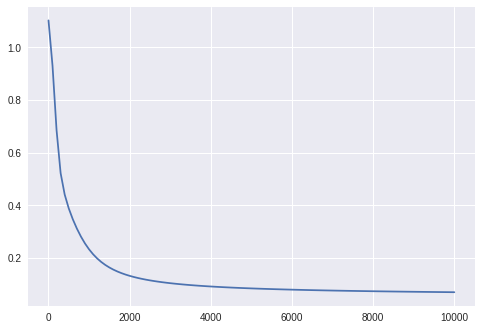

Final train_loss 0.0694705315116142
Final train_accuracy 0.975
Testloss 0.028533261809706716
Accuracy is 1.0


In [12]:
# Initialize the neural network model and specify the parameters 

hidden_no=10000
nnobj= NeuralNetwork(cols,hidden_no,3)       
epochs = 10000
learning_rate = 1e-2
loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    yPred= nnobj.forward(X_train)
    nnobj.backward(X_train, y_train,yPred, lr=learning_rate)
    loss=crossEntropy_loss(yPred, y_train)
    if e==0 or (e+1)%100==0:
        loss_history.append(loss)
        epoch_history.append(e+1)
        
print('Loss fuction decrease after ' + str(epochs) + ' epochs of training')
#Plot the decrease in loss with epoch
plt.plot(epoch_history, loss_history)
plt.show()

    
train_loss= crossEntropy_loss(nnobj.forward(X_train), y_train)
train_accuracy= accuracy(nnobj.forward(X_train), y_train)
test_loss= crossEntropy_loss(nnobj.forward(X_test), y_test)
test_accuracy= accuracy(nnobj.forward(X_test), y_test)
    
print("Final train_loss "+ str(train_loss))    
print("Final train_accuracy "+ str(train_accuracy))    
print("Testloss " + str(test_loss))
print("Accuracy is "+ str(test_accuracy))

        
            